In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv("customer_data(filtered).csv", encoding="cp949")

df.head()



,Score,Review,SNS,Addr
0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도
1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시
2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시
3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시
4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도


In [5]:
from konlpy.tag import Twitter


In [6]:
twitter = Twitter()

In [47]:
def tokenize(text):
    stems =[]
    tagged = twitter.pos(text)
    for i in range(0, len(tagged)):
        if(tagged[i][1]=='Noun' or tagged[i][1]=='Adjective'):
            stems.append(tagged[i][0])
    return stems

In [48]:
tagged = twitter.pos(df['Review'][0])
for i in range(0, len(tagged)):
    if(tagged[i][1]=='Noun'):
        print(tagged[i][0], tagged[i][1])
        


데 Noun
일리 Noun
적 Noun
부터 Noun
고기 Noun
인스턴트 Noun
음식 Noun
장 Noun
상태 Noun
더욱 Noun
업무 Noun
스트레스 Noun
또한 Noun
것 Noun
체험 Noun
보고 Noun
장 Noun
경험 Noun
보고 Noun


In [49]:
print(tokenize(df['Review'][0]))

['안녕하세', '데', '일리', '적', '부터', '좋', '고기', '인스턴트', '음식', '좋아하다', '장', '상태', '더욱', '좋', '업무', '스트레스', '또한', '심한', '것', '같구', '체험', '보고', '건강한', '장', '경험', '보고']


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
text_data_list = df['Review'].astype(str).tolist()
text_data_list
text_data_arr = np.array([''.join(text) for text in text_data_list])

In [163]:
vectorizer = TfidfVectorizer(min_df=2, tokenizer=tokenize, norm='l2')
text_data = vectorizer.fit_transform(text_data_arr)

In [164]:
df_tfidf = pd.DataFrame(text_data.A, columns= vetorizer.get_feature_names())
df_tfidf.head()

,가게,가격,가구,가기,가까이,가끔,가능,가능성,가능하다,가능한,...,희망이,힘,힘드네,힘든,힘들,힘들어,힘들었,힘듭니,힘찬,힝
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

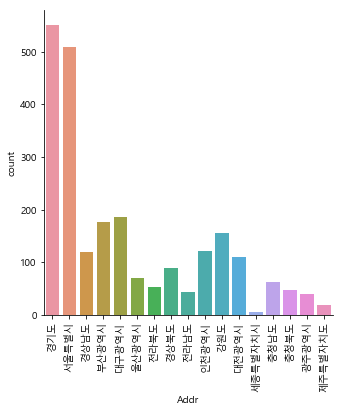

In [167]:
g = sns.factorplot('Addr', data= df, kind ='count', size=5)
g.set_xticklabels(rotation=90)
g.set_xlabels()

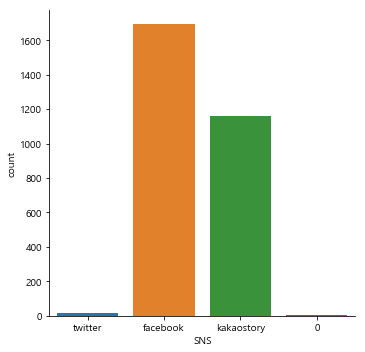

In [168]:
g = sns.factorplot('SNS', data= df, kind ='count', size=5)
#g.set_xticklabels(rotation=90)
g.set_xlabels()

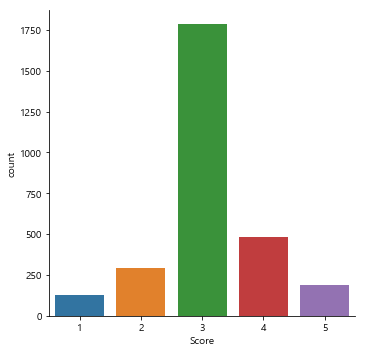

In [169]:
g = sns.factorplot('Score', data= df, kind ='count', size=5)
#g.set_xticklabels(rotation=90)
g.set_xlabels()

In [170]:
df = df.dropna(subset=['Score'])
df.index = range(0, len(df))
df['Score2'] = ''

In [171]:
for i in range(0, len(df)):
    if(df['Score'][i]<3):
        df['Score2'][i] ='bad'
    elif(df['Score'][i]>3):
        df['Score2'][i]='good'
    elif (df['Score'][i]==3):
        df['Score2'][i]='normal'
df

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Unnamed: 0,Score,Review,SNS,Addr,Score2
0,0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good
5,5,3,항상 소화가 잘 되지않는 와이프를 위하여 선물하고 싶습니다. 아이 둘 보느라 식사를...,facebook,부산광역시,normal
6,6,1,요즘 넘 피곤해서 체험해 보고 싶어요.,facebook,대구광역시,bad
7,7,1,향상 변비가 있고 소화가 잘 되지 않습니다.,twitter,대구광역시,bad
8,8,2,이랫배는묵직하고 대변이 잘안나옵니다..턱주위에 뾰루지도 자주나요.. 체험분 당첨...,twitter,울산광역시,bad
9,9,5,작은 설사와 배변장애로 작년초 부터 프로바이오 틱스를 복용하고 있습니다. 미국 pr...,kakaostory,경기도,good


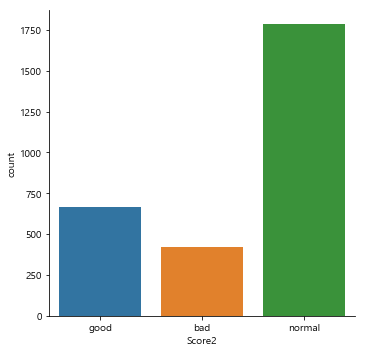

In [180]:
g = sns.factorplot('Score2', data= df, kind ='count', size=5)
#g.set_xticklabels(rotation=90)
g.set_xlabels()

In [181]:
df.to_csv('customer_data(filterd)_generated.csv')

In [182]:
df= pd.read_csv("customer_data(filterd)_generated.csv")

In [183]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Score,Review,SNS,Addr,Score2
0,0,0,0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,1,1,1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,2,2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,3,3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,4,4,4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


In [184]:
review_data = df['Review'].astype(str).tolist()
review_label = df['Score2'].astype(str).tolist()

In [198]:
trainset_size = int(round(len(review_data)*0.80))

x_train = np.array([''.join(data) for data in review_data[0:trainset_size]])
y_train = np.array([data for data in review_label[0:trainset_size]])

x_test = np.array([''.join(data) for data in review_data[trainset_size+1:len(review_data)]])
y_test = np.array([data for data in review_label[trainset_size+1:len(review_label)]])


In [199]:
train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [281]:
df_per = pd.DataFrame(columns=["Classifier",'F-Measure',"Accuracy"])
df_per

,Classifier,F-Measure,Accuracy


In [282]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



In [283]:
from sklearn.naive_bayes import MultinomialNB

#학습시키기
nb_classifier = MultinomialNB().fit(X_train, y_train)


In [284]:
#검증하기
nb_pred = nb_classifier.predict(X_test)

In [285]:
#검증 결과 성능 표기하기
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pred))

print('\n Classification Report Matrix \n')
print(classification_report(y_test, nb_pred))

print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pred, normalize=True),2))


 Confusion Matrix 

[[  0   0  60]
 [  0   9  92]
 [  0   2 410]]

 Classification Report Matrix 

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        60
       good       0.82      0.09      0.16       101
     normal       0.73      1.00      0.84       412

avg / total       0.67      0.73      0.63       573


 Accuracy 

0.73


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [286]:
#성능저장 
fm = round(f1_score(y_test, nb_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pred, normalize =True), 2)
df_per.loc[len(df_per)] = ['Naive Bayes', fm, ac]

df_per


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73


In [287]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier().fit(X_train , y_train)
dt_pred = dt_classifier.predict(X_test)

In [288]:
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, dt_pred))
print('\n Classification Report \n')
print(classification_report(y_test, dt_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, dt_pred, normalize=True),2))


 Confusion Matrix 

[[ 45   2  13]
 [  1  70  30]
 [ 33  53 326]]

 Classification Report 

             precision    recall  f1-score   support

        bad       0.57      0.75      0.65        60
       good       0.56      0.69      0.62       101
     normal       0.88      0.79      0.83       412

avg / total       0.79      0.77      0.78       573


 Accuracy 

0.77


In [289]:
fm = round(f1_score(y_test, dt_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, dt_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Decison Tree', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.78,0.77


In [290]:
from sklearn.ensemble import RandomForestClassifier


In [291]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [292]:
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, rf_pred))
print('\n Classification Report \n')
print(classification_report(y_test, rf_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, rf_pred, normalize=True),2))


 Confusion Matrix 

[[ 46   0  14]
 [  0  58  43]
 [ 22   2 388]]

 Classification Report 

             precision    recall  f1-score   support

        bad       0.68      0.77      0.72        60
       good       0.97      0.57      0.72       101
     normal       0.87      0.94      0.91       412

avg / total       0.87      0.86      0.85       573


 Accuracy 

0.86


In [293]:
fm = round(f1_score(y_test, rf_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, rf_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Random Forest', fm, ac]
df_per


,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.78,0.77
2,Random Forest,0.85,0.86


In [294]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC().fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, svm_pred))
print('\n Classification Report \n')
print(classification_report(y_test, svm_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, svm_pred, normalize=True),2))


 Confusion Matrix 

[[ 38   2  20]
 [  0  57  44]
 [ 37  54 321]]

 Classification Report 

             precision    recall  f1-score   support

        bad       0.51      0.63      0.56        60
       good       0.50      0.56      0.53       101
     normal       0.83      0.78      0.81       412

avg / total       0.74      0.73      0.73       573


 Accuracy 

0.73


In [295]:
fm = round(f1_score(y_test, svm_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, svm_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Support Vector Machine', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.78,0.77
2,Random Forest,0.85,0.86
3,Support Vector Machine,0.73,0.73


In [298]:
df_per_1 = df_per.set_index('Classifier')
df_per_1

,F-Measure,Accuracy
Classifier,,
Naive Bayes,0.63,0.73
Decison Tree,0.78,0.77
Random Forest,0.85,0.86
Support Vector Machine,0.73,0.73


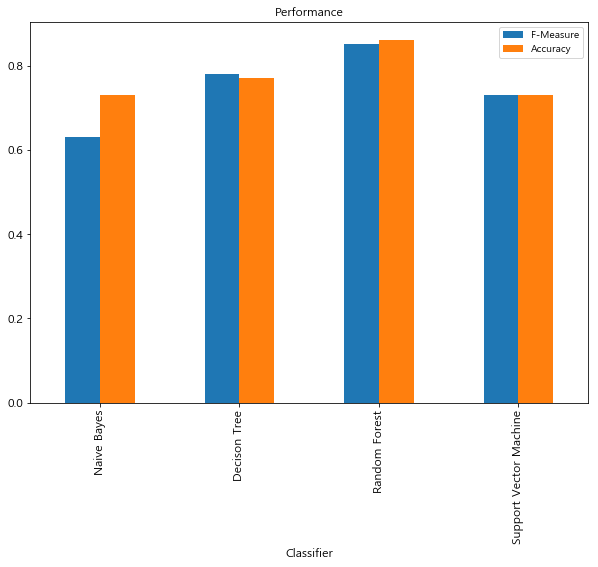

In [302]:
ax = df_per_1[['F-Measure','Accuracy']].plot(kind='bar', title ='Performance'
                                             , figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel('Classifier', fontsize=12)
plt.show()